In [340]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import io
import sys
import matplotlib as plt
import geopandas as gpd
import optparse
import urllib.request
import json
import requests
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [341]:
os.environ["PUIDATA"] = "%s/PUIData"%os.getenv("HOME")
PUIData = os.getenv('PUIDATA')
print (PUIData)

/nfshome/em3845/PUIData


In [342]:
#uploading the map, I am using PLUTO as in homework 7.
! rm $PUIDATA/*geo*

url = 'https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile'
urllib.request.urlretrieve(url, "files.zip")
! unzip files.zip -d $PUIDATA
files = ! ls $PUIDATA | grep '.shp'
filename = files[0]
pumashp =  gpd.GeoDataFrame.from_file(os.getenv('PUIDATA') + "/" + filename)
pumashp.head()

Archive:  files.zip
  inflating: /nfshome/em3845/PUIData/geo_export_c686b85b-27fb-4b15-b8d6-b1698f304899.dbf  
  inflating: /nfshome/em3845/PUIData/geo_export_c686b85b-27fb-4b15-b8d6-b1698f304899.shp  
  inflating: /nfshome/em3845/PUIData/geo_export_c686b85b-27fb-4b15-b8d6-b1698f304899.shx  
  inflating: /nfshome/em3845/PUIData/geo_export_c686b85b-27fb-4b15-b8d6-b1698f304899.prj  


,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...


In [343]:
pumashp['puma'] = pumashp.puma.astype(int)

In [344]:
# Reading the census data on median age per puma
filename = "ACS_17_1YR_GCT0101_ST50_with_ann.csv"
age_data =  pd.read_csv(os.getenv('PUIDATA') + "/" + filename,header=1, encoding='latin-1')
print(age_data.columns)
print(age_data.dtypes)
age_data.head()

Index(['Id', 'Id2', 'Geography', 'Target Geo Id', 'Target Geo Id2',
       'Geographic Area', 'Geographic Area.1', 'Median Age',
       'Margin of Error'],
      dtype='object')
Id                    object
Id2                    int64
Geography             object
Target Geo Id         object
Target Geo Id2         int64
Geographic Area       object
Geographic Area.1     object
Median Age           float64
Margin of Error      float64
dtype: object


,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographic Area,Geographic Area.1,Median Age,Margin of Error
0,0400000US01,1,Alabama,0400000US01,1,Alabama,Alabama,38.9,0.2
1,0400000US01,1,Alabama,7950000US0100100,100100,"Alabama - Lauderdale, Colbert, Franklin & Mari...","Lauderdale, Colbert, Franklin & Marion (Northe...",42.0,0.8
2,0400000US01,1,Alabama,7950000US0100200,100200,Alabama - Limestone & Madison (Outer) Counties...,Limestone & Madison (Outer) Counties--Huntsvil...,38.9,1.2
3,0400000US01,1,Alabama,7950000US0100301,100301,Alabama - Huntsville (North) & Madison (East) ...,Huntsville (North) & Madison (East) Cities PUMA,38.5,2.4
4,0400000US01,1,Alabama,7950000US0100302,100302,Alabama - Huntsville City (Central & South) PUMA,Huntsville City (Central & South) PUMA,39.2,3.1


In [345]:
# substracting New York data

age_data = age_data.loc[age_data.Id2 == 36]
#removing the first, general row on the city

age_data = age_data[age_data['Target Geo Id2'] != 36]
age_data['gid']=age_data['Target Geo Id2'].astype(int)-3600000
age_data.head(10)

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographic Area,Geographic Area.1,Median Age,Margin of Error,gid
1412,0400000US36,36,New York,7950000US3600100,3600100,New York - St. Lawrence County PUMA,St. Lawrence County PUMA,39.1,0.8,100
1413,0400000US36,36,New York,7950000US3600200,3600200,"New York - Clinton, Franklin, Essex & Hamilton...","Clinton, Franklin, Essex & Hamilton Counties PUMA",40.9,1.0,200
1414,0400000US36,36,New York,7950000US3600300,3600300,New York - Warren & Washington Counties PUMA,Warren & Washington Counties PUMA,45.4,0.4,300
1415,0400000US36,36,New York,7950000US3600401,3600401,New York - Herkimer (North & Central) & Oneida...,Herkimer (North & Central) & Oneida (Outer) Co...,45.4,1.6,401
1416,0400000US36,36,New York,7950000US3600402,3600402,New York - Oneida County (Central)--Greater Ut...,Oneida County (Central)--Greater Utica & Rome ...,38.5,1.3,402
1417,0400000US36,36,New York,7950000US3600403,3600403,"New York - Otsego, Schoharie, Oneida (South) &...","Otsego, Schoharie, Oneida (South) & Herkimer (...",43.2,0.7,403
1418,0400000US36,36,New York,7950000US3600500,3600500,New York - Jefferson & Lewis Counties PUMA,Jefferson & Lewis Counties PUMA,34.1,0.6,500
1419,0400000US36,36,New York,7950000US3600600,3600600,New York - Oswego County PUMA,Oswego County PUMA,40.4,0.5,600
1420,0400000US36,36,New York,7950000US3600701,3600701,New York - Onondaga County (Central)--Syracuse...,Onondaga County (Central)--Syracuse City PUMA,30.7,1.2,701
1421,0400000US36,36,New York,7950000US3600702,3600702,New York - Onondaga County (North) PUMA,Onondaga County (North) PUMA,39.9,1.8,702


In [346]:
# merging the two datasets
puma = pumashp.merge(age_data, right_on='gid', 
                     left_on='puma', how = 'left').fillna(0)
#puma.head()
puma.crs

{'init': 'epsg:4326'}

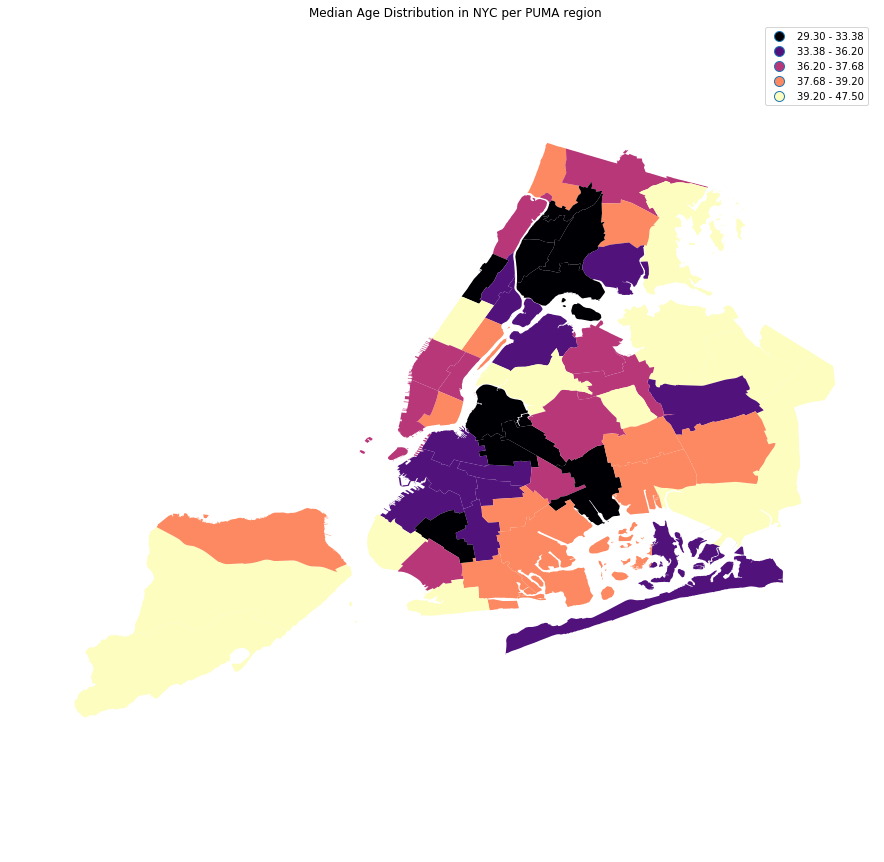

In [347]:
f, ax = plt.subplots(1, figsize=(15,15))
ax.axis('off')
plt.axis('equal')
plt.title("Median Age Distribution in NYC per PUMA region")
puma.plot(ax=ax, column='Median Age',cmap='magma',alpha=1,
                  linewidth=0.1,scheme="quantiles", legend=True, k=5)

In [348]:
# Donwloading the Citi Bike Data

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
        

In [349]:
datestring = '201601'
getCitiBikeCSV(datestring)
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.dtypes

file in place, you can continue


tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

In [350]:
# Creating a Geo Data Frame based on Citi Bike statation locations (turned into POINTS)
import shapely
from shapely.geometry import Point
from geopandas import GeoDataFrame
from fiona.crs import from_epsg

df['lonlat'] = list(zip(df['start station longitude'],df['start station latitude']))
df['geometry']=df[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
df = GeoDataFrame(df)
df.crs = from_epsg(4326)

In [351]:
type(df)

geopandas.geodataframe.GeoDataFrame

The idea was to see if average age of the region has impact on amount of the CitiBike stations.


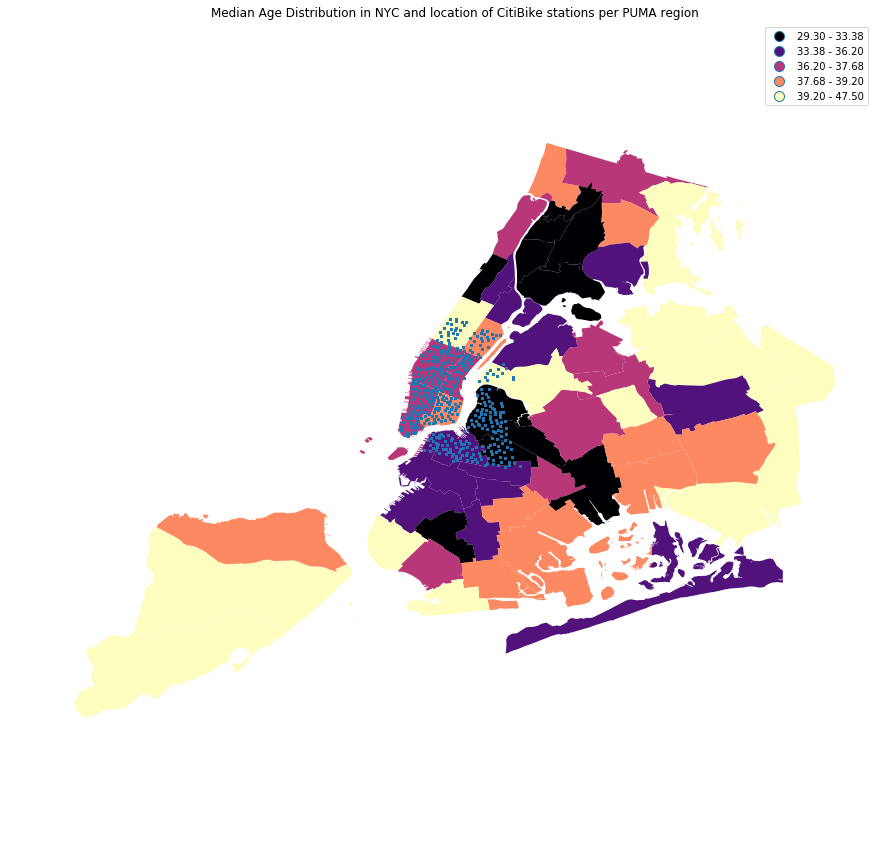

In [352]:
# Plotting citibike locations on the heatmap
f, ax = plt.subplots(1, figsize=(15,15))
ax.axis('off')
plt.axis('equal')
plt.title("Median Age Distribution in NYC and location of CitiBike stations per PUMA region")
puma.plot(ax=ax, column='Median Age',cmap='magma',alpha=1,
                  linewidth=0.1,scheme="quantiles", legend=True, k=5)
df.plot(markersize=4,ax=ax)
print("The idea was to see if average age of the region has impact on amount of the CitiBike stations.")